In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

## Data preperation

<IPython.core.display.Javascript object>


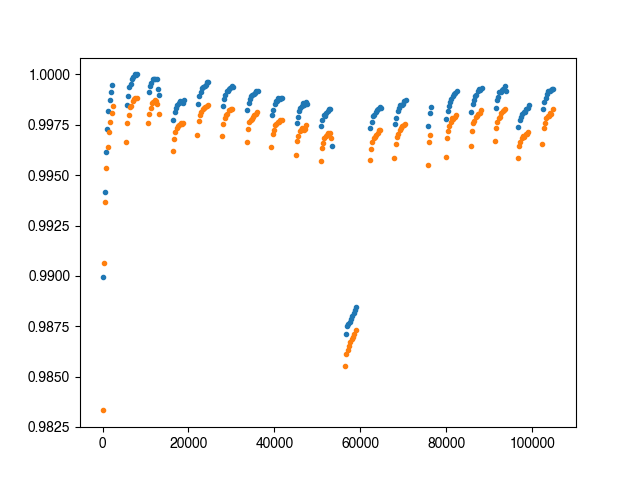

In [78]:
# data examination
BJD, f, err, scanD = np.loadtxt('w18_lc.txt', unpack=True)
f0 = f / f.max()
t = (BJD - BJD.min()) * 86400
plt.figure()
plt.plot(t[scanD == 0], f0[scanD == 0], '.')
plt.plot(t[scanD == 1], f0[scanD == 1], '.')
df = pd.DataFrame()
df['time'] = t
df['flux'] = f
df['flux0'] = f0
df['scanD'] = scanD
df = df.sort_values('time')

<IPython.core.display.Javascript object>


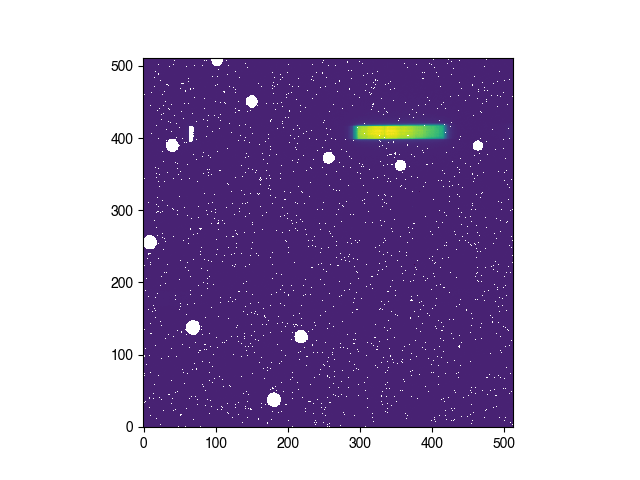

In [79]:
# take a look at one image
from astropy.io import fits
im = fits.getdata('iccz25g5q_red.fits', 'sci', 1)
mask = fits.getdata('iccz25g5q_red.fits', 'MASK')
im = np.ma.array(im, mask=mask)
plt.figure()
plt.imshow(im, origin='lower')

<IPython.core.display.Javascript object>


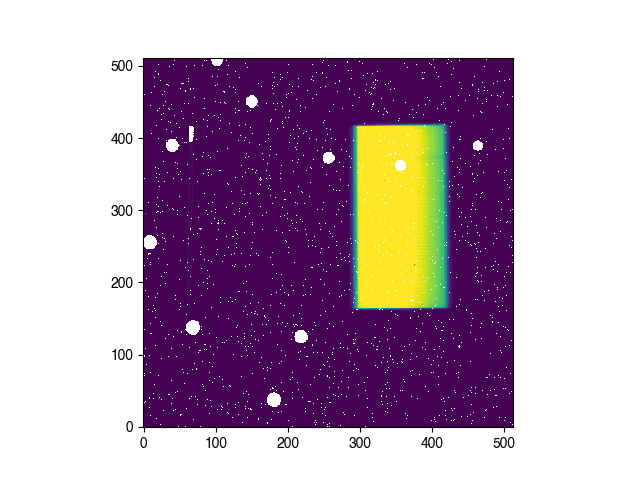

In [80]:
# combine the image to get the average count rate
nFrame = 13
im = np.zeros((512, 512))
for i in range(nFrame):
    im = im + fits.getdata('iccz25g5q_red.fits', ('sci', i+1))
im = np.ma.array(im, mask=mask)
fig = plt.figure()
plt.imshow(im, origin='lower', vmin=1000, vmax=25000)

<IPython.core.display.Javascript object>


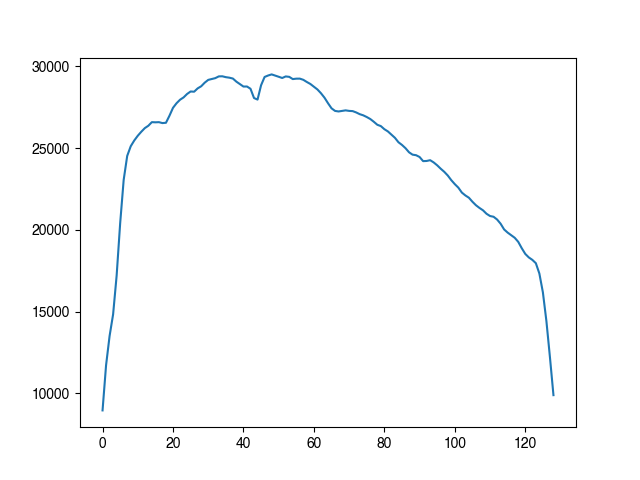

In [81]:
# take a rough measurement of the average count rate
xmin= 291
xmax = 420
ymin = 170
ymax = 405
imspec = im[ymin:ymax, xmin:xmax]
spec = imspec.mean(axis=0)
fig = plt.figure()
plt.plot(spec)
count = spec.mean()
df['flux0'] = df['flux0'] * count  # normalize the light curve to count

<IPython.core.display.Javascript object>


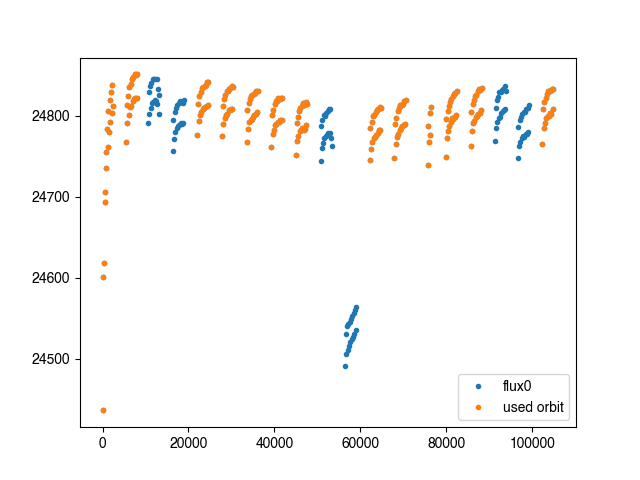

In [82]:
# get the orbit number
dt = df['time'].values[1] - df['time'].values[0]
orbit = np.zeros_like(t)
orbit_i = 0
for i, o in enumerate(orbit[1:]):
    dt_i = df['time'].values[i+1] - df['time'].values[i]
    if dt_i > dt * 5:
        orbit_i += 1
    orbit[i+1] = orbit_i
df['orbit'] = orbit

# ignore several orbit when carrying out the fit
weights = np.zeros_like(orbit)
orbit_use = [0, 1, 4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 18]
for o in orbit_use:
    weights[orbit == o] = 1
df['weights'] = weights
fig = plt.figure()
plt.plot(df['time'], df['flux0'], '.')
plt.plot(df['time'].values[weights==1], df['flux0'].values[weights==1], '.',
label = 'used orbit')
plt.legend()
df.to_csv('w18.csv', index=False)

## Detector model correction

<IPython.core.display.Javascript object>


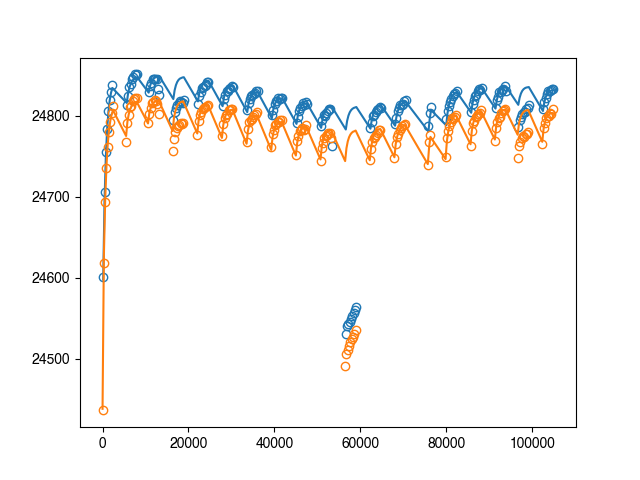

<IPython.core.display.Javascript object>


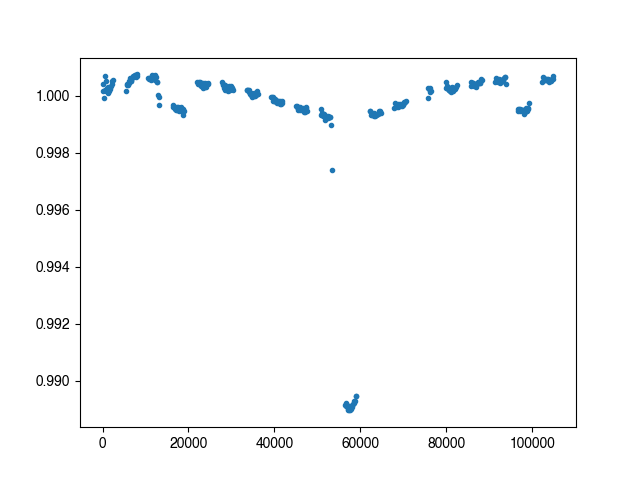

<IPython.core.display.Javascript object>


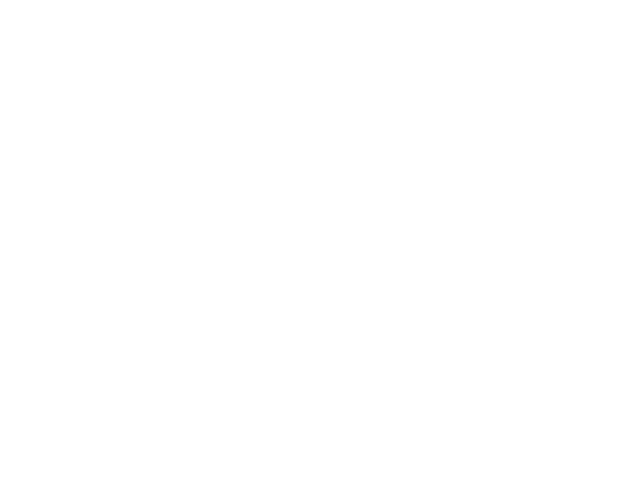

In [83]:
%run -i lc_model